In [1]:
import cv2

img1 = cv2.imread('/home/nata-brain/camera_ws/src/EyeHeadTrack/vision/report/overlay_image.png')
img2 = cv2.imread('/home/nata-brain/camera_ws/src/EyeHeadTrack/vision/test_images/grocery.jpg')

print(img1.shape)
print(img2.shape)

(1080, 1920, 3)
(1080, 1920, 3)


In [23]:
import cv2
import numpy as np

# Load the base image and overlay image
base_image = cv2.imread("/home/nata-brain/camera_ws/src/EyeHeadTrack/vision/test_images/grocery.jpg")
overlay_image = cv2.imread("/home/nata-brain/camera_ws/src/EyeHeadTrack/vision/scripts/result_image.jpg")

# Resize the overlay image to match the dimensions of the base image
overlay_image = cv2.resize(overlay_image, (base_image.shape[1], base_image.shape[0]))

# Perform image addition
result = cv2.add(base_image, overlay_image)

# Save the resulting image
cv2.imwrite("result_image_process.jpg", result)

True

In [21]:
import cv2
import time
import numpy as np


def threshImageBg():
    # Load the image
    image = cv2.imread("/home/nata-brain/camera_ws/src/EyeHeadTrack/vision/report/heatmap.png")

    # Define the white color range in BGR format
    lower_white = np.array([200, 200, 200], dtype=np.uint8)
    upper_white = np.array([255, 255, 255], dtype=np.uint8)

    # Create a mask of white pixels within the defined range
    mask = cv2.inRange(image, lower_white, upper_white)

    # Invert the mask to select non-white pixels
    mask_inv = cv2.bitwise_not(mask)

    # Apply the mask to remove white pixels
    result = cv2.bitwise_and(image, image, mask=mask_inv)

    # Save the result image
    cv2.imwrite("/home/nata-brain/camera_ws/src/EyeHeadTrack/vision/report/heatmap1.jpg", result)


# ADD Images
def addImages():
    base_image = cv2.imread("/home/nata-brain/camera_ws/src/EyeHeadTrack/vision/test_images/grocery.jpg")
    threshImageBg()
    overlay_image = cv2.imread("/home/nata-brain/camera_ws/src/EyeHeadTrack/vision/report/heatmap1.jpg")
    
    # Resize the overlay image to match the dimensions of the base image
    overlay_image = cv2.resize(overlay_image, (base_image.shape[1], base_image.shape[0]))

    # Convert the images to grayscale
    base_gray = cv2.cvtColor(base_image, cv2.COLOR_BGR2GRAY)
    overlay_gray = cv2.cvtColor(overlay_image, cv2.COLOR_BGR2GRAY)

    # Create a mask by thresholding the overlay image
    _, mask = cv2.threshold(overlay_gray, 15, 255, cv2.THRESH_BINARY)

    # Invert the mask
    mask_inv = cv2.bitwise_not(mask)

    # Use bitwise operations to apply the mask and overlay the images
    base_masked = cv2.bitwise_and(base_image, base_image, mask=mask_inv)
    overlay_masked = cv2.bitwise_and(overlay_image, overlay_image, mask=mask)
    result = cv2.add(base_masked, overlay_masked)

    # Save the resulting image
    cv2.imwrite("/home/nata-brain/camera_ws/src/EyeHeadTrack/vision/report/result_image.jpg", result)
    
if __name__ == '__main__':
    addImages()

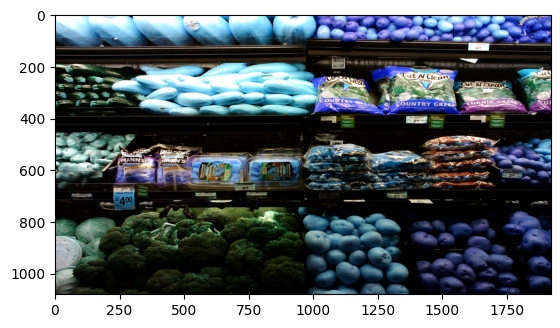

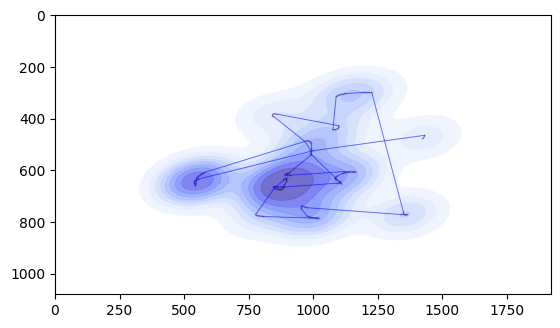

In [22]:
import matplotlib.pyplot as plt 

base_image = cv2.imread("/home/nata-brain/camera_ws/src/EyeHeadTrack/vision/test_images/grocery.jpg")
overlay_image = cv2.imread("/home/nata-brain/camera_ws/src/EyeHeadTrack/vision/report/heatmap.png")

plt.imshow(base_image)
plt.show()

plt.imshow(overlay_image)
plt.show()


In [ ]:
import cv2

# Define the desired width and height for the enlarged overlay image
new_width = 2 * base_image.shape[1]  # Multiply by a scaling factor (e.g., 2)
new_height = 2 * base_image.shape[0]

# Resize the overlay image to the desired size
enlarged_overlay = cv2.resize(overlay_image, (new_width, new_height))

# Overlay the enlarged image onto the base image
result = cv2.add(base_image, enlarged_overlay)

# Save the resulting image
cv2.imwrite("result_image.jpg", result)

In [31]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img =  cv2.imread("/home/nata-brain/camera_ws/src/EyeHeadTrack/vision/report/heatmap_overlay.png")
img.shape

(1009, 1920, 3)

In [34]:
image_cropped = image[0:1080, 0:1920]

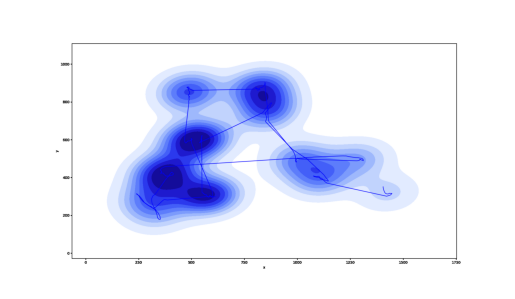

In [35]:
plt.imshow(image_cropped, cmap='gray')
plt.axis("off")
plt.show()

In [9]:
import cv2
import seaborn as sns
import matplotlib.pyplot as plt
import dbscan_lib as dbs

# Set the background image
bg_image = plt.imread('/home/nata-brain/camera_ws/src/EyeHeadTrack/vision/test_images/grocery.jpg')
img = plt.imread('/home/nata-brain/camera_ws/src/EyeHeadTrack/vision/report/heatmap.jpg')

print(bg_image.shape, img.shape)

dst = cv2.addWeighted(bg_image, 0.5, img, 0.7, 0)

cv2.imshow('Blended Image',dst)

cv2.waitKey(0)
cv2.destroyAllWindows()

(1080, 1920, 3) (1080, 1920, 3)
